In [1]:
# in this notebook, we are going explore the data after cleaning in the first step
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

import pprint


In [2]:
df = pd.read_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\1-cleaned_employee_reviews.csv')
                  #sep=',' , engine = 'python')

In [3]:
df.shape

(40000, 15)

In [4]:
df.head(3)

,company,location,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,feedback,job_status,job_title,post_day,post_month,post_year
0,amazon,"Seattle, WA",4.0,4.0,2.5,4.0,4.5,4.0,0,Early opinions of working at amazon Exciting. ...,Current Employee,Senior Systems Engineer,20,3,2010
1,apple,"Cupertino, CA",5.0,5.0,5.0,5.0,5.0,5.0,0,Amazing company to work for! Very friendly env...,Current Employee,ITunes Account and Billing,31,10,2014
2,amazon,Unknown,5.0,3.0,5.0,5.0,5.0,5.0,1,Different and great company - you get huge res...,Current Employee,Anonymous Employee,16,4,2018


In [5]:
 # printing all the features
df.columns

Index(['company', 'location', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'helpful-count',
       'feedback', 'job_status', 'job_title', 'post_day', 'post_month',
       'post_year'],
      dtype='object')

In [6]:
# Check the null values
df.isnull().sum().tolist()


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

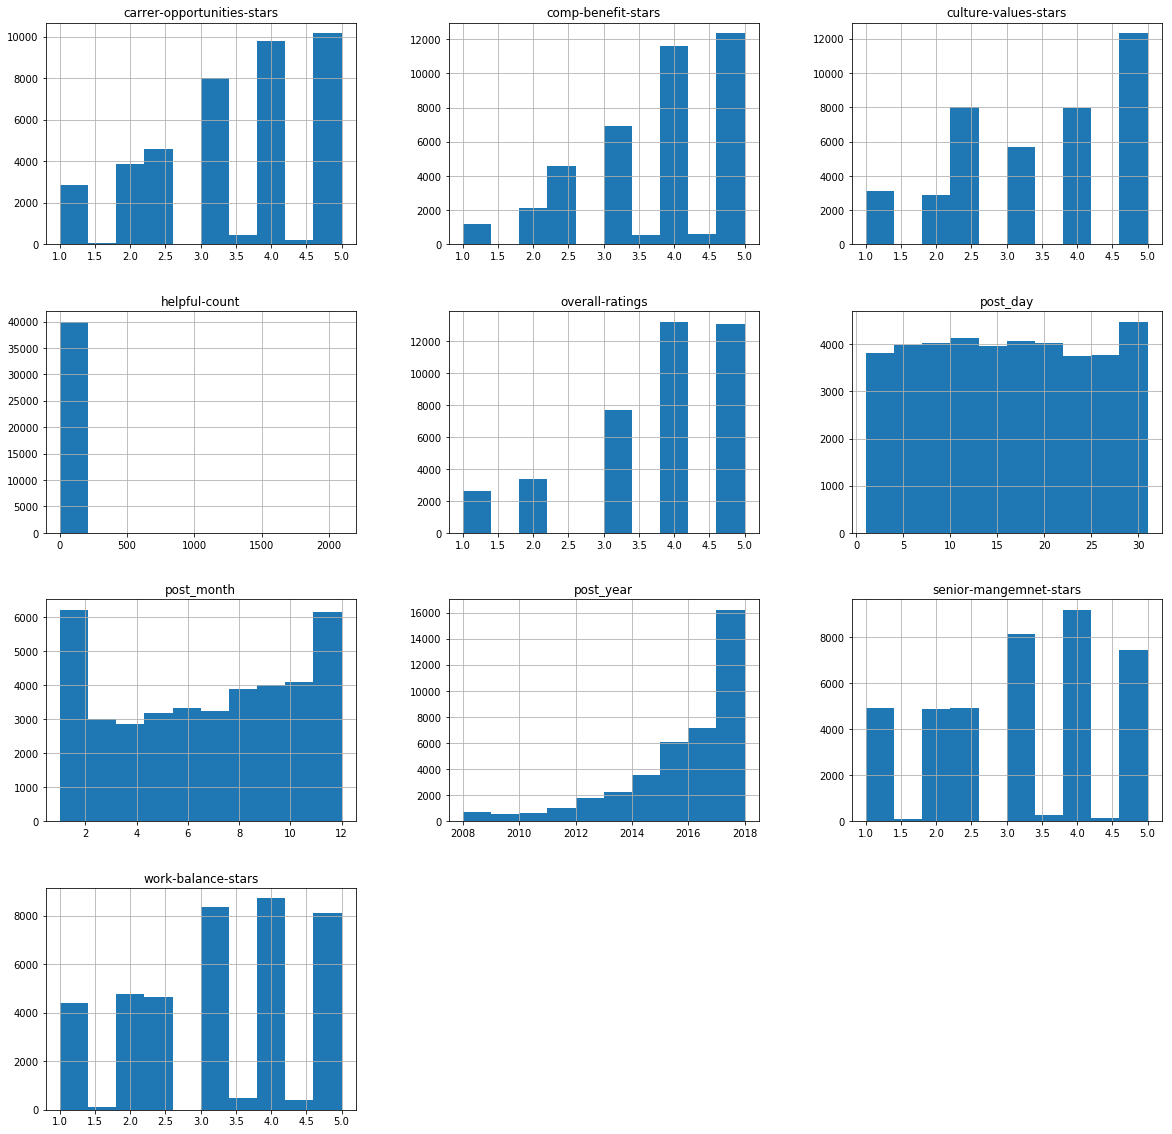

In [7]:
# plot histogram for each parameter
df.hist(figsize=(20,20))
plt.show()

In [8]:
df['helpful-count'].value_counts().sort_values()

78          1
37          1
121         1
2094        1
164         1
193         1
89          1
40          1
294         1
248         1
58          1
47          1
88          1
45          1
50          1
498         1
51          1
110         1
74          1
52          1
822         1
136         1
46          2
49          2
1275        2
449         3
26          3
41          3
43          3
44          3
        ...  
31          6
29          8
28          9
27          9
21         14
22         15
24         16
17         19
23         20
25         21
19         25
20         29
16         37
18         38
15         47
13         50
14         51
12         78
11         83
10        113
9         146
8         216
7         257
6         362
5         542
4         839
3        1402
2        2624
1        6260
0       26591
Name: helpful-count, Length: 67, dtype: int64

In [9]:
# Check the data types so that we can convert all the data into numeric form
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
company                       40000 non-null object
location                      40000 non-null object
overall-ratings               40000 non-null float64
work-balance-stars            40000 non-null float64
culture-values-stars          40000 non-null float64
carrer-opportunities-stars    40000 non-null float64
comp-benefit-stars            40000 non-null float64
senior-mangemnet-stars        40000 non-null float64
helpful-count                 40000 non-null int64
feedback                      40000 non-null object
job_status                    40000 non-null object
job_title                     40000 non-null object
post_day                      40000 non-null int64
post_month                    40000 non-null int64
post_year                     40000 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 4.6+ MB


In [10]:
#### categorical to numeric data

# company - dummy encoding can be used as there are only 5-6 categories here
# location - we can use frequency distribution (later use bins if needed)

# feedback is textual data and needs a separate processing

# job status - former - 1, current - 0 
# job title - too many - frequency distribution (later use bins if needed)


In [11]:
df.company.value_counts()

amazon       15426
microsoft    10604
apple         7847
google        4790
facebook       831
netflix        502
Name: company, dtype: int64

In [12]:
company_dummy_df = pd.get_dummies(df[['company']])

In [13]:
company_dummy_df.tail(15)

,company_amazon,company_apple,company_facebook,company_google,company_microsoft,company_netflix
39985,0,0,0,0,1,0
39986,0,0,0,0,1,0
39987,0,1,0,0,0,0
39988,0,1,0,0,0,0
39989,0,0,0,0,1,0
39990,0,0,0,1,0,0
39991,0,0,0,1,0,0
39992,1,0,0,0,0,0
39993,0,0,0,0,1,0
39994,0,0,0,0,1,0


In [14]:
# merge the company dummy df with main df
df = pd.concat([df, company_dummy_df], axis=1)

# and drop company column as there's no need of it now
df = df.drop('company', axis= 1)

df.shape

(40000, 20)

In [15]:
df.job_status.value_counts()

Current Employee    20000
Former Employee     20000
Name: job_status, dtype: int64

In [16]:
# Map months in string to corresponding number in order
df['job_status'] = df['job_status'].map({'Current Employee': 0 ,
                                         'Former Employee' : 1})


In [17]:
df.job_status.value_counts()

1    20000
0    20000
Name: job_status, dtype: int64

In [18]:
df['job_title'] = df['job_title'].astype('str')
df.job_title.value_counts()

 Anonymous Employee                                     16406
 Software Engineer                                       1016
 Software Development Engineer                            715
 Specialist                                               617
 Program Manager                                          477
 Warehouse Associate                                      464
 Fulfillment Associate                                    348
 Senior Software Engineer                                 327
 Software Development Engineer II                         326
 Senior Program Manager                                   319
 Mac Specialist (Apple Store)                             234
 Manager                                                  219
 Software Development Engineer In Test (SDET)             184
 Area Manager                                             176
 Director                                                 174
 Senior Software Development Engineer                     171
 Family 

In [19]:
# job_title : categorical to numerical variable based on their frequency distribution

job_title_keys = df['job_title'].drop_duplicates().values.tolist()
job_title_keys.sort()
print("Actual values of job_title \n")
print(job_title_keys)

# put count of each value of job_title in a list
job_title_values = df.job_title.value_counts().sort_index().tolist()
print("\n job_title value counts:-")
print(job_title_values)

# calculate frequency distribution
job_title_values = [x / sum(job_title_values) for x in job_title_values]
print("\nFreq dist:-")
print(job_title_values)

job_title_dict = dict(zip(job_title_keys, job_title_values))
print("\n job_title's dictionary with actual values and their corresponding freq. dist.:-")
print(job_title_dict)

# now map these freq dist valeus to the dataframe 

# replace values of job_title with their freq dist
df['job_title_num'] = df['job_title'].map(job_title_dict)
df.head(5)

Actual values of job_title 

[' 3D Artist', ' 3D Artist III', ' 3D Artist, Graphic Design,', ' 3D Modeler/Texturer', ' 3D Touch-up Artist/3dmodeler', ' 3D Track Artist', ' 3D VIsion', ' 55 Years', ' A&amp,B Billing Escalation Agent', ' AA(Amazon Associate)', ' ACM Technician', ' ACS- (Xerox) Quality Analyst/Sales Coach/Technical Support Advisor', ' AFE Associate', ' AFE II/Induct', ' AFE Pack Side', ' AFE Packer', ' AFE: Outbound, I Was Able to Perform Any Position', ' AFM', ' AHA - At Home Advisor', ' AHA Advisor', ' AHA Apple Care', ' AHA At Home IOS/CPU T1 Support', ' AHA Chat Support', ' AHA IOS Advisor', ' AHA Latin America', ' AHA Mac+ Chat', ' AHA Pro', ' AHA Senior Advisor Mac+', ' AHA Support', ' AHA Team Manager', ' AI2 Associate', ' AM, Retail Business Services', ' ANDHRA PRADESH', ' AOS', ' AOS Blended Agent', ' AOS Chat Sales Agent', ' AOS Sales Manager', ' AP Manager', ' APPLE At Home Team Lead', ' APS Lead', ' AREA PROGRAM MANAGER', ' AREA SALES MANAGER', ' ASC', ' ASG O

,location,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,feedback,job_status,...,post_day,post_month,post_year,company_amazon,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num
0,"Seattle, WA",4.0,4.0,2.5,4.0,4.5,4.0,0,Early opinions of working at amazon Exciting. ...,0,...,20,3,2010,1,0,0,0,0,0,0.00040
1,"Cupertino, CA",5.0,5.0,5.0,5.0,5.0,5.0,0,Amazing company to work for! Very friendly env...,0,...,31,10,2014,0,1,0,0,0,0,0.00005
2,Unknown,5.0,3.0,5.0,5.0,5.0,5.0,1,Different and great company - you get huge res...,0,...,16,4,2018,1,0,0,0,0,0,0.41015
3,"Seattle, WA",3.0,2.0,2.0,3.0,4.0,2.0,2,Better than your average sweat shop! Good bene...,0,...,3,1,2013,1,0,0,0,0,0,0.00050
4,Unknown,5.0,5.0,5.0,5.0,5.0,5.0,0,"Great Company to Work For, Highly Recommended ...",0,...,27,12,2017,1,0,0,0,0,0,0.41015


In [20]:

print("\n job_title's dictionary with actual values and their corresponding freq. dist.:-")
pprint.pprint((job_title_dict))



 job_title's dictionary with actual values and their corresponding freq. dist.:-
{' 3D Artist': 7.5e-05,
 ' 3D Artist III': 5e-05,
 ' 3D Artist, Graphic Design,': 2.5e-05,
 ' 3D Modeler/Texturer': 2.5e-05,
 ' 3D Touch-up Artist/3dmodeler': 5e-05,
 ' 3D Track Artist': 2.5e-05,
 ' 3D VIsion': 5e-05,
 ' 55 Years': 2.5e-05,
 ' A&amp,B Billing Escalation Agent': 5e-05,
 ' AA(Amazon Associate)': 5e-05,
 ' ACM Technician': 2.5e-05,
 ' ACS- (Xerox) Quality Analyst/Sales Coach/Technical Support Advisor': 5e-05,
 ' AFE Associate': 2.5e-05,
 ' AFE II/Induct': 2.5e-05,
 ' AFE Pack Side': 2.5e-05,
 ' AFE Packer': 5e-05,
 ' AFE: Outbound, I Was Able to Perform Any Position': 2.5e-05,
 ' AFM': 2.5e-05,
 ' AHA - At Home Advisor': 5e-05,
 ' AHA Advisor': 0.00025,
 ' AHA Apple Care': 2.5e-05,
 ' AHA At Home IOS/CPU T1 Support': 5e-05,
 ' AHA Chat Support': 2.5e-05,
 ' AHA IOS Advisor': 2.5e-05,
 ' AHA Latin America': 5e-05,
 ' AHA Mac+ Chat': 2.5e-05,
 ' AHA Pro': 2.5e-05,
 ' AHA Senior Advisor Mac+': 

 ' Director of Marketing': 0.00025,
 ' Director of Operations': 2.5e-05,
 ' Director of PM': 2.5e-05,
 ' Director of Product Management': 5e-05,
 ' Director of Product Marketing': 2.5e-05,
 ' Director of Product Planning': 5e-05,
 ' Director of Program Management': 5e-05,
 ' Director of R&amp,D': 5e-05,
 ' Director of Research, Design and Development': 7.5e-05,
 ' Director of Sales': 2.5e-05,
 ' Director of Strategy': 0.00015,
 ' Director of Testing': 2.5e-05,
 ' Director++': 2.5e-05,
 ' Director, Business &amp, Legal Affairs, Original Series': 2.5e-05,
 ' Director, Cloud Services': 2.5e-05,
 ' Director, Customer Insights': 2.5e-05,
 ' Director, Digital Marketing': 2.5e-05,
 ' Director, Global Delivery': 2.5e-05,
 ' Director, In-Store Marketing': 2.5e-05,
 ' Director, Law and Corporate Affairs': 2.5e-05,
 ' Director, Marketing Communications': 2.5e-05,
 ' Director-Partner Development': 2.5e-05,
 ' Disc Return': 2.5e-05,
 ' Display Engineer': 2.5e-05,
 ' Display Optimization Specialist'

 ' Lead': 0.000375,
 ' Lead - ECommerce Solutions': 2.5e-05,
 ' Lead Account Strategist': 2.5e-05,
 ' Lead Architect': 2.5e-05,
 ' Lead Cashier': 2.5e-05,
 ' Lead Creative': 0.00015,
 ' Lead Designer': 2.5e-05,
 ' Lead Developer': 5e-05,
 ' Lead Development Representative - Leader': 2.5e-05,
 ' Lead Genius': 0.0003,
 ' Lead Mac Genius': 0.000125,
 ' Lead Maintenance Technician': 5e-05,
 ' Lead Marketing Manager': 7.5e-05,
 ' Lead Process Assistant': 5e-05,
 ' Lead Product Design Engineer': 2.5e-05,
 ' Lead Product Manager': 2.5e-05,
 ' Lead Product Planner': 5e-05,
 ' Lead Program Manager': 0.000525,
 ' Lead Project Specialist': 2.5e-05,
 ' Lead Quality Engineer': 2.5e-05,
 ' Lead SAP FICO Consultant': 2.5e-05,
 ' Lead Security Counsel': 2.5e-05,
 ' Lead Senior Software Development Engineer': 2.5e-05,
 ' Lead Software Developer': 5e-05,
 ' Lead Software Development Engineer': 0.00015,
 ' Lead Software Development Engineer In Test (SDET)': 0.000275,
 ' Lead Software Engineer': 2.5e-05,


 ' Programmatic Specialist': 2.5e-05,
 ' Programme Manager II': 2.5e-05,
 ' Programmer': 0.000425,
 ' Programmer Analyst': 0.00025,
 ' Programmer Analystlyst': 2.5e-05,
 ' Programmer Manager': 5e-05,
 ' Programmer Writer': 7.5e-05,
 ' Programmer, Security Engineer, Cloud Computing': 2.5e-05,
 ' Programmer/Analyst': 0.00015,
 ' Programmer/Analyst II': 7.5e-05,
 ' Programming': 5e-05,
 ' Programming Expert': 2.5e-05,
 ' Programming Writer': 0.000125,
 ' Programming Writer II': 2.5e-05,
 ' Programming Writer/Technical Lead': 7.5e-05,
 ' Project Coordinator': 0.00015,
 ' Project Engineer': 2.5e-05,
 ' Project Lead': 2.5e-05,
 ' Project Leader': 2.5e-05,
 ' Project Management Engineer': 2.5e-05,
 ' Project Manager': 0.0017,
 ' Project Manager - Consultant': 2.5e-05,
 ' Project Manager II': 5e-05,
 ' Project Specialist': 2.5e-05,
 ' Prossing Assosate': 2.5e-05,
 ' Préparateur De Commande': 2.5e-05,
 ' Public Sector Lead': 5e-05,
 ' Publications Manager': 5e-05,
 ' Pup Driver, Picker and Pack

 ' Senior Technician SNOC': 2.5e-05,
 ' Senior Technology Solutions Professional': 5e-05,
 ' Senior Technology Strategist': 2.5e-05,
 ' Senior Test Engineer': 5e-05,
 ' Senior Test Lead': 0.000175,
 ' Senior Trade Compliance IT': 2.5e-05,
 ' Senior Trainer': 2.5e-05,
 ' Senior Training Specialist': 2.5e-05,
 ' Senior Treasury Analyst': 5e-05,
 ' Senior UI Engineer': 5e-05,
 ' Senior User Experience': 5e-05,
 ' Senior User Experience Architect': 2.5e-05,
 ' Senior User Experience Designer': 0.0007,
 ' Senior User Experience Evangalist': 2.5e-05,
 ' Senior User Experience Researcher': 7.5e-05,
 ' Senior User Interface Engineer': 2.5e-05,
 ' Senior Vendor Manager': 0.000575,
 ' Senior Vendor Manager - Kitchen': 5e-05,
 ' Senior Vendor Operations Associate': 2.5e-05,
 ' Senior Video Codec Engineer': 2.5e-05,
 ' Senior Video Producer/Project Manager': 2.5e-05,
 ' Senior Voice Engineer': 2.5e-05,
 ' Senior Wireless Engineer': 2.5e-05,
 ' Senior, Catalog Associate': 2.5e-05,
 ' Senior, Softwa

 ' Waterspider/Picker/Counter/Stower': 2.5e-05,
 ' Wear House Worker': 2.5e-05,
 ' Web Applications Developer': 2.5e-05,
 ' Web Architect': 2.5e-05,
 ' Web Content Administrator': 2.5e-05,
 ' Web Designer': 7.5e-05,
 ' Web Developer': 0.00035,
 ' Web Development Engineer': 0.00015,
 ' Web Development Engineer II': 7.5e-05,
 ' Web Engineer': 5e-05,
 ' Web Producer': 0.000125,
 ' Web Publisher': 2.5e-05,
 ' Web Scraper': 2.5e-05,
 ' Web Solutions Engineer': 5e-05,
 ' Web Store Publisher': 2.5e-05,
 ' Website Manager': 2.5e-05,
 ' Werehouse Associate': 2.5e-05,
 ' Wharehouse Associate': 7.5e-05,
 ' Whole Foods Shopper': 7.5e-05,
 ' Windows Ambassador': 5e-05,
 ' Windows Phone Developer': 2.5e-05,
 ' Wireless Multi-Media Technical Support': 2.5e-05,
 ' Wireless RF Engineer': 2.5e-05,
 ' Wireless Team Lead': 2.5e-05,
 ' Work At Home Customer Service Representative': 2.5e-05,
 ' Work At Home Tech Support': 2.5e-05,
 ' Work From Home Advisor': 5e-05,
 ' Work From Home Customer Service Represe

In [21]:
df.job_title_num.value_counts()

0.410150    16406
0.000025     2059
0.000050     1658
0.025400     1016
0.000075     1014
0.017875      715
0.015425      617
0.000100      560
0.000125      485
0.011925      477
0.011600      464
0.000150      390
0.008700      348
0.004275      342
0.008175      327
0.008150      326
0.000175      322
0.007975      319
0.000225      306
0.000275      297
0.000300      276
0.003425      274
0.000200      272
0.003175      254
0.000250      240
0.000750      240
0.005850      234
0.000425      221
0.005475      219
0.000900      216
            ...  
0.000600       96
0.002375       95
0.000775       93
0.002225       89
0.002200       88
0.002175       87
0.000700       84
0.002025       81
0.000975       78
0.000325       78
0.000925       74
0.001825       73
0.001750       70
0.001725       69
0.000850       68
0.001700       68
0.001675       67
0.000550       66
0.001550       62
0.001475       59
0.000725       58
0.001425       57
0.001400       56
0.001350       54
0.001300  

In [22]:
# Check the null values
df.isnull().sum().tolist()


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
df.head(5)

,location,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,feedback,job_status,...,post_day,post_month,post_year,company_amazon,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num
0,"Seattle, WA",4.0,4.0,2.5,4.0,4.5,4.0,0,Early opinions of working at amazon Exciting. ...,0,...,20,3,2010,1,0,0,0,0,0,0.00040
1,"Cupertino, CA",5.0,5.0,5.0,5.0,5.0,5.0,0,Amazing company to work for! Very friendly env...,0,...,31,10,2014,0,1,0,0,0,0,0.00005
2,Unknown,5.0,3.0,5.0,5.0,5.0,5.0,1,Different and great company - you get huge res...,0,...,16,4,2018,1,0,0,0,0,0,0.41015
3,"Seattle, WA",3.0,2.0,2.0,3.0,4.0,2.0,2,Better than your average sweat shop! Good bene...,0,...,3,1,2013,1,0,0,0,0,0,0.00050
4,Unknown,5.0,5.0,5.0,5.0,5.0,5.0,0,"Great Company to Work For, Highly Recommended ...",0,...,27,12,2017,1,0,0,0,0,0,0.41015


In [24]:
# location : categorical to numerical variable based on their frequency distribution

location_keys = df['location'].drop_duplicates().values.tolist()
location_keys.sort()
print("Actual values of location \n")
print(location_keys)

# put count of each value of location in a list
location_values = df.location.value_counts().sort_index().tolist()
print("\n location value counts:-")
print(location_values)

# calculate frequency distribution
location_values = [x / sum(location_values) for x in location_values]
print("\nFreq dist:-")
print(location_values)

location_dict = dict(zip(location_keys, location_values))
print("\n location's dictionary with actual values and their corresponding freq. dist.:-")
print(location_dict)

# now map these freq dist valeus to the dataframe 

# replace values of location with their freq dist
df['location_num'] = df['location'].map(location_dict)
df.head(5)

Actual values of location 

['Aberdeen, SD', 'Aberdeen, Scotland (UK)', 'Abha (Saudi Arabia)', "Abidjan (Cote d'Ivoire)", 'Abu Dhabi, Abu Dhabi (United Arab Emirates)', 'Abuja, Niger (Nigeria)', 'Addison, TX', 'Adelaide (Australia)', 'Aha (Turkey)', 'Ahmedabad (India)', 'Ajmer (India)', 'Akron, OH', 'Alameda, CA', 'Alamogordo, NM', 'Albany, NY', 'Albuquerque, NM', 'Alexandria (Egypt)', 'Alexandria, VA', 'Algiers (Algeria)', 'All Stretton, England (UK)', 'Allentown, NJ', 'Allentown, PA', 'Allston, MA', 'Almaty (Kazakhstan)', 'Alpharetta, GA', 'Altamonte Springs, FL', 'Amazon, MT', 'Amba (Russia)', 'Ambala (Sri Lanka)', 'Amherst, NY', 'Amsterdam (Netherlands)', 'Anchorage, AK', 'Anderson, IN', 'Ang Mo Kio, North-East (Singapore)', 'Ankara (Turkey)', 'Ann Arbor, MI', 'Apache Junction, AZ', 'Apex, NC', 'Apple Valley, CA', 'Appleton, WI', 'Ardmore, PA', 'Argyle, TX', 'Arifiye (Turkey)', 'Arlington, VA', 'Artesia, CA', 'Ashbourne (Ireland)', 'Ashburn, VA', 'Asheboro, NC', 'Asheville, NC', 'A

,location,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,feedback,job_status,...,post_month,post_year,company_amazon,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,location_num
0,"Seattle, WA",4.0,4.0,2.5,4.0,4.5,4.0,0,Early opinions of working at amazon Exciting. ...,0,...,3,2010,1,0,0,0,0,0,0.00040,0.068375
1,"Cupertino, CA",5.0,5.0,5.0,5.0,5.0,5.0,0,Amazing company to work for! Very friendly env...,0,...,10,2014,0,1,0,0,0,0,0.00005,0.018650
2,Unknown,5.0,3.0,5.0,5.0,5.0,5.0,1,Different and great company - you get huge res...,0,...,4,2018,1,0,0,0,0,0,0.41015,0.377600
3,"Seattle, WA",3.0,2.0,2.0,3.0,4.0,2.0,2,Better than your average sweat shop! Good bene...,0,...,1,2013,1,0,0,0,0,0,0.00050,0.068375
4,Unknown,5.0,5.0,5.0,5.0,5.0,5.0,0,"Great Company to Work For, Highly Recommended ...",0,...,12,2017,1,0,0,0,0,0,0.41015,0.377600


In [25]:
print("\n location's dictionary with actual values and their corresponding freq. dist.:-")
pprint.pprint(location_dict)



 location's dictionary with actual values and their corresponding freq. dist.:-
{'Aberdeen, SD': 2.5e-05,
 'Aberdeen, Scotland (UK)': 2.5e-05,
 'Abha (Saudi Arabia)': 5e-05,
 "Abidjan (Cote d'Ivoire)": 2.5e-05,
 'Abu Dhabi, Abu Dhabi (United Arab Emirates)': 0.00015,
 'Abuja, Niger (Nigeria)': 7.5e-05,
 'Addison, TX': 5e-05,
 'Adelaide (Australia)': 7.5e-05,
 'Aha (Turkey)': 2.5e-05,
 'Ahmedabad (India)': 0.00015,
 'Ajmer (India)': 2.5e-05,
 'Akron, OH': 0.00035,
 'Alameda, CA': 2.5e-05,
 'Alamogordo, NM': 5e-05,
 'Albany, NY': 0.000225,
 'Albuquerque, NM': 0.000325,
 'Alexandria (Egypt)': 5e-05,
 'Alexandria, VA': 2.5e-05,
 'Algiers (Algeria)': 2.5e-05,
 'All Stretton, England (UK)': 5e-05,
 'Allentown, NJ': 5e-05,
 'Allentown, PA': 0.000775,
 'Allston, MA': 2.5e-05,
 'Almaty (Kazakhstan)': 0.000125,
 'Alpharetta, GA': 0.000175,
 'Altamonte Springs, FL': 5e-05,
 'Amazon, MT': 2.5e-05,
 'Amba (Russia)': 2.5e-05,
 'Ambala (Sri Lanka)': 5e-05,
 'Amherst, NY': 5e-05,
 'Amsterdam (Netherl

 'Piscataway, NJ': 2.5e-05,
 'Pitts, PA': 0.0001,
 'Pittsburgh, PA': 0.000825,
 'Pittston, PA': 2.5e-05,
 'Plainfield, IN': 0.00085,
 'Plainfield, NJ': 2.5e-05,
 'Plano, TX': 0.000175,
 'Pleasant Prairie, WI': 2.5e-05,
 'Pleasanton, CA': 5e-05,
 'Plymouth, MN': 2.5e-05,
 'Pointe-Claire, QC (Canada)': 2.5e-05,
 'Poland, ME': 2.5e-05,
 'Pom-o-sa Heights, MO': 2.5e-05,
 'Pompano Beach, FL': 2.5e-05,
 'Poplar Bluff, MO': 2.5e-05,
 'Port Elizabeth (South Africa)': 5e-05,
 'Port Orchard, WA': 0.0001,
 'Portland, ME': 5e-05,
 'Portland, OR': 0.001275,
 'Poznań, Greater Poland (Poland)': 2.5e-05,
 'Prague (Czech Republic)': 0.00135,
 'Praha (Slovakia)': 2.5e-05,
 'Princeton, NJ': 7.5e-05,
 'Privateer, SC': 2.5e-05,
 'Priština (Serbia)': 2.5e-05,
 'Providence, RI': 2.5e-05,
 'Pryor, OK': 5e-05,
 'Puget, WA': 5e-05,
 'Pune (India)': 0.002225,
 'Pune City (India)': 0.0002,
 'Puntarenas (Costa Rica)': 2.5e-05,
 'Puyallup, WA': 5e-05,
 'Quebec, QC (Canada)': 5e-05,
 'Raanana (Israel)': 0.0001,
 'Ra

In [26]:
df.location_num.value_counts()

0.377600    15104
0.081925     3277
0.068375     2735
0.030075     1203
0.025375     1015
0.022975      919
0.018650      746
0.016200      648
0.013875      555
0.000025      480
0.000050      466
0.010800      432
0.000075      411
0.010050      402
0.009575      383
0.008950      358
0.008300      332
0.000100      272
0.001625      260
0.002150      258
0.006375      255
0.000150      252
0.002100      252
0.000250      250
0.000125      245
0.000175      238
0.001775      213
0.005150      206
0.002525      202
0.004850      194
            ...  
0.001175       94
0.000775       93
0.002250       90
0.002225       89
0.000525       84
0.002075       83
0.000675       81
0.002000       80
0.000650       78
0.000925       74
0.000600       72
0.001800       72
0.000900       72
0.000875       70
0.001725       69
0.000575       69
0.000550       66
0.000750       60
0.001425       57
0.000700       56
0.001375       55
0.000625       50
0.001225       49
0.001200       48
0.001150  

In [27]:
df.head(5)

,location,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,feedback,job_status,...,post_month,post_year,company_amazon,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,location_num
0,"Seattle, WA",4.0,4.0,2.5,4.0,4.5,4.0,0,Early opinions of working at amazon Exciting. ...,0,...,3,2010,1,0,0,0,0,0,0.00040,0.068375
1,"Cupertino, CA",5.0,5.0,5.0,5.0,5.0,5.0,0,Amazing company to work for! Very friendly env...,0,...,10,2014,0,1,0,0,0,0,0.00005,0.018650
2,Unknown,5.0,3.0,5.0,5.0,5.0,5.0,1,Different and great company - you get huge res...,0,...,4,2018,1,0,0,0,0,0,0.41015,0.377600
3,"Seattle, WA",3.0,2.0,2.0,3.0,4.0,2.0,2,Better than your average sweat shop! Good bene...,0,...,1,2013,1,0,0,0,0,0,0.00050,0.068375
4,Unknown,5.0,5.0,5.0,5.0,5.0,5.0,0,"Great Company to Work For, Highly Recommended ...",0,...,12,2017,1,0,0,0,0,0,0.41015,0.377600


In [28]:
df.columns

Index(['location', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'helpful-count',
       'feedback', 'job_status', 'job_title', 'post_day', 'post_month',
       'post_year', 'company_amazon', 'company_apple', 'company_facebook',
       'company_google', 'company_microsoft', 'company_netflix',
       'job_title_num', 'location_num'],
      dtype='object')

In [29]:
df_numeric = df[[ 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'helpful-count',
        'job_status', 'post_day', 'post_month',
       'post_year', 'company_amazon', 'company_apple', 'company_facebook',
       'company_google', 'company_microsoft', 'company_netflix',
       'job_title_num', 'location_num']]

df_text = df[['feedback', 'job_status']]

In [30]:
# it should contain only  numeric values
df_numeric.head()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,job_status,post_day,post_month,post_year,company_amazon,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,location_num
0,4.0,4.0,2.5,4.0,4.5,4.0,0,0,20,3,2010,1,0,0,0,0,0,0.00040,0.068375
1,5.0,5.0,5.0,5.0,5.0,5.0,0,0,31,10,2014,0,1,0,0,0,0,0.00005,0.018650
2,5.0,3.0,5.0,5.0,5.0,5.0,1,0,16,4,2018,1,0,0,0,0,0,0.41015,0.377600
3,3.0,2.0,2.0,3.0,4.0,2.0,2,0,3,1,2013,1,0,0,0,0,0,0.00050,0.068375
4,5.0,5.0,5.0,5.0,5.0,5.0,0,0,27,12,2017,1,0,0,0,0,0,0.41015,0.377600


In [31]:
df_text.head(5)

,feedback,job_status
0,Early opinions of working at amazon Exciting. ...,0
1,Amazing company to work for! Very friendly env...,0
2,Different and great company - you get huge res...,0
3,Better than your average sweat shop! Good bene...,0
4,"Great Company to Work For, Highly Recommended ...",0


In [32]:
# time to save the data 
# full data
df.to_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\2_both_numeric_and_text_full.csv' , index=False)
# only numeric values with class labels as job status
df_numeric.to_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\2_numeric_data.csv' , index=False)
# only text data with class lables as job status
df_text.to_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\2_text_data.csv' , index=False)